<H1>Stirling asymptotics</H1>

(Sethna, "Entropy, Order Parameters, and Complexity", ex. 1.5)


Stirling's formula is the first part of an asymptotic series. Asymptotic series are not the same as power series, but are often even more useful.

In [13]:
from scipy import *
import math
import matplotlib.pyplot as plt

We first define the standard Stirling approximation to the $\Gamma$ function. (Note this is slightly different from the expansion for $n! = \Gamma(n+1)$. 

In [14]:
def gammaStirlingStandard(z):
    return math.sqrt(2*math.pi/z) * z**z * math.exp(-z)

We copy the coefficients for Stirling's formula from Mathematica. Compare to formula 1.3 in exercise 1.5.

In [15]:
StirlingCoefs = [1, 1/12, 1/288, -139/51840, -571/2488320, 163879/209018880, 
     5246819/75246796800, -534703531/902961561600, 
     -4483131259/86684309913600, 432261921612371/514904800886784000, 
     6232523202521089/86504006548979712000, -25834629665134204969/
      13494625021640835072000, -1579029138854919086429/
      9716130015581401251840000, 746590869962651602203151/
      116593560186976815022080000, 1511513601028097903631961/
      2798245444487443560529920000, -8849272268392873147705987190261/
      299692087104605205332754432000000, -142801712490607530608130701097701/
      57540880724084199423888850944000000, 
     2355444393109967510921431436000087153/
      13119320805091197468646658015232000000, 
     2346608607351903737647919577082115121863/
      155857531164483425927522297220956160000000, 
     -2603072187220373277150999431416562396331667/
      1870290373973801111130267566651473920000000, 
     -73239727426811935976967471475430268695630993/
      628417565655197173339769902394895237120000000, 
     34856851734234401648335623107688675640839679447003/
      2601648721812516297626647395914866281676800000000, 
     909773124599542506852275229422593983242880452145053/
      811714401205505084859513987525438279883161600000000, 
     -1527335577854677023023224272800947125313629267269390501/
      9740572814466061018314167850305259358597939200000000, 
     -183856455668177802003316143799518064719008299958634826921/
      14026424852831127866372401704439573476381032448000000000, 
     2583312098861137963745902036370496943872138148651712093816393/
      1178219687637814740775281743172924172016006725632000000000, 
     5180134290822682443757710427952467581918233549140896702364013/
      28277272503307553778606761836150180128384161415168000000000, 
     -527550309097873396592733540579928993424142983691519876840948418433873/
      14613128884259277641708402381685690086746366936130519040000000000, 
     -2114866241537081164613223324215572812504648703648482437460602956015127/
      701430186444445326802003314320913124163825612934264913920000000000, 
     180394412915538782140015777241228025103785450235726235175126981743099027459/260932029357333661570345232927379682188943128011546547978240000000000, 
     3226140192053936286912811949056082647586604417173687729452086326364208020303641/
      55891640688340870308367948893044727924871618020073270576939008000000000000,
 -10218654456520534088469164280902985100842191028132480093114328858063973003580356809/
      670699688260090443700415386716536735098459416240879246923268096000000000000,
 -11294270192060551526555825418377569122875449049360883617198277415758886356961061261/
      8880988975581887254515845120660348492338221235741297614432239616000000000000,
 230728480231290522008048001606562350241176825393088090041361149344312886801922569309571253/602663911882986869091445249888011248690071693057404456115371780341760000000000000,
 8780281712344249180626150512221439934592746549863336386520284834871601659328384283145974399/274814743818642012305699033948933129402672692034176431988609531835842560000000000000, 
     -65055679003182430423234281865622332849269489661844508633433219901904175381055443012118665958239159/5978869566518375619722788182592989163284547087895542454344188974620590735360000000000000,
 -4160439817028779676022608475860808455203802493147838405248227514580847308149550626237967072257979519/4582514222596019507245595071561594274827123832528970603716707420547910834585600000000000000,
 25739595107049129518438458090403692183654984839076592277587399621277514087385399113875378525247018408357/74117186556770402465015711592213611749377828943512046286200659149731427411558400000000000000,
 1185356971130098386071769043814501538538935809024244586455334462229374012405477660247088667012987822132001/40912686979337262160688672798901913685656561576818649549982763850651747931180236800000000000000,
 -3734458725948069000883071068850009040874034770684071766694513626567994145012490009440208988682451631689349911503/301935629907508994745882405255896123000145424436921633678872797217809899732110147584000000000000000]

We now define a function which returns the asymptotic series for $\Gamma(z)$ truncated after n terms.

In [16]:
def gammaStirling(n,z):
    if n < len(StirlingCoefs):
        return gammaStirlingStandard(z)*sum([(1/z**m) * StirlingCoefs[m] for m in range(n)])
    else:
        print("n too big")
    

We evaluate successive approximations for $\Gamma(1)=0!$
You should find that they start off rather close to the right answer, but at some point go crazy. (Higher order expansions get worse! This is characteristic of asymptotic expansions.)

In [17]:
[[n,gammaStirling(n,1)] for n in range(1,20)]


<ipython-input-16-a42b00c679e0>:3: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  return gammaStirlingStandard(z)*sum([(1/z**m) * StirlingCoefs[m] for m in range(n)])


[[1, 0.9221370088957891],
 [2, 0.9989817596371048],
 [3, 1.0021836242513265],
 [4, 0.9997110732436776],
 [5, 0.9994994685336406],
 [6, 1.0002224601164145],
 [7, 1.0002867590126416],
 [8, 0.9997407004253318],
 [9, 0.999693009427344],
 [10, 1.0004671422665965],
 [11, 1.0005335812736798],
 [12, 0.9987682066828976],
 [13, 0.9986183444224372],
 [14, 1.0045231222728794],
 [15, 1.0050212281962547],
 [16, 0.9777924763819567],
 [17, 0.975503968761562],
 [18, 1.1410645552852088],
 [19, 1.1549483543295356]]

The expansions for $1! = \Gamma(2)$ converge better. (2 is closer to $\infty$ than one is.) But they too eventually go crazy. Let's do the plot to compare the two.

<ipython-input-16-a42b00c679e0>:3: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  return gammaStirlingStandard(z)*sum([(1/z**m) * StirlingCoefs[m] for m in range(n)])


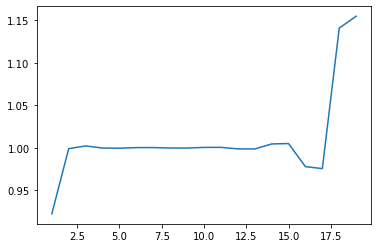

In [18]:
plt.plot(range(1,20),[gammaStirling(n,1) for n in range(1,20)])
plt.show()

<ipython-input-16-a42b00c679e0>:3: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  return gammaStirlingStandard(z)*sum([(1/z**m) * StirlingCoefs[m] for m in range(n)])


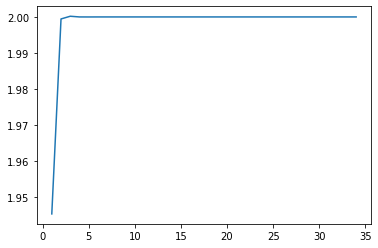

In [22]:
plt.plot(range(1,35),[gammaStirling(n,2) for n in range(1,35)])
plt.show()

